# Assignment 1 - Regression Models
### Submitted By:- Hemang Sharma (24695785)

## Part C: Experiment on multivariate linear regression with feature engineering or with any algorithms of your choice.

In this section, we will be performing multivariate linear regression with feature engineering using scikit-learn library<br><br>

This code performs the following steps:

1. Load the training and testing datasets.
2. Split the training dataset into training and validation datasets using train_test_split() function from Scikit-Learn.
3. Define the features and target variable.
4. Extract the features and target variable as numpy arrays for training and validation datasets.
5. Train a multivariate linear regression model using the training data.
6. Make predictions using the validation data.
7. Calculate the mean squared error and root mean squared error for the validation data.
8. Plot the predicted values against the actual values for the validation data using Altair.
9. Make predictions using the testing data.
10. Calculate the mean squared error and root mean squared error for the testing data.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import altair as alt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the training and testing datasets
train_data = pd.read_csv('cancer_us_county-training.csv')
test_data = pd.read_csv('cancer_us_county-testing.csv')

# Split the training dataset into training and validation datasets
train_set, val_set = train_test_split(train_data, test_size=0.2, random_state=42)

# Define the features and target variable
features = ['avgAnnCount', 'incidenceRate', 'medIncome', 'popEst2015']
target = 'TARGET_deathRate'

# Extract the features and target variable as numpy arrays for training
X_train = train_set[features].values
y_train = train_set[target].values

# Extract the features and target variable as numpy arrays for validation
X_val = val_set[features].values
y_val = val_set[target].values

# Train a multivariate linear regression model using the training data
reg = LinearRegression().fit(X_train, y_train)

# Make predictions using the validation data
y_pred = reg.predict(X_val)

# Calculate the mean squared error and root mean squared error for the validation data
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)

print("Mean squared error (MSE) on validation data: {:.2f}".format(mse))
print("Root mean squared error (RMSE) on validation data: {:.2f}".format(rmse))

# Plot the predicted values against the actual values for the validation data
df = pd.DataFrame({'Actual': y_val, 'Predicted': y_pred})
charts = alt.Chart(df).mark_circle().encode(
    x='Actual',
    y='Predicted',
    tooltip=['Actual', 'Predicted']
).interactive()
charts

Mean squared error (MSE) on validation data: 417.43
Root mean squared error (RMSE) on validation data: 20.43


alt.Chart(...)

In [5]:
# Make predictions using the testing data
X_test = test_data[features].values
y_test = test_data[target].values
y_pred_test = reg.predict(X_test)

# Calculate the mean squared error and root mean squared error for the testing data
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)

print("Mean squared error (MSE) on testing data: {:.2f}".format(mse_test))
print("Root mean squared error (RMSE) on testing data: {:.2f}".format(rmse_test))

# Plot the predicted values against the actual values for the testing data
df_test = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
chart_test = alt.Chart(df_test).mark_circle().encode(
    x='Actual',
    y='Predicted',
    tooltip=['Actual', 'Predicted']
).interactive()
chart_test

Mean squared error (MSE) on testing data: 488.62
Root mean squared error (RMSE) on testing data: 22.10


alt.Chart(...)

The graphs are scatter plots of predicted values against actual values for the validation and testing data. In the validation data plot, each point represents a county and the x-coordinate represents the actual value of the target variable (TARGET_deathRate), while the y-coordinate represents the predicted value of the target variable. A perfect model would have all the points on the diagonal line with a slope of 1, which indicates that the predicted value is exactly the same as the actual value. Deviations from the diagonal line indicate discrepancies between the predicted and actual values. The closer the points are to the diagonal line, the better the model is at making predictions.

Similarly, the testing data plot shows the scatter plot of predicted values against actual values for the testing data. The plot is used to evaluate how well the model generalizes to new, unseen data. In both plots, the tooltip shows the actual and predicted values for each point when the cursor hovers over it.

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

train_data = pd.read_csv('cancer_us_county-training.csv')
test_data = pd.read_csv('cancer_us_county-testing.csv')
# Define the features and target variable
features = ['avgAnnCount', 'incidenceRate', 'medIncome', 'popEst2015']
target = 'TARGET_deathRate'

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_data[features], train_data[target], test_size=0.2, random_state=42)

# Train a linear regression model using the training data
reg = LinearRegression().fit(X_train, y_train)

# Make predictions using the training and validation data
y_pred_train = reg.predict(X_train)
y_pred_val = reg.predict(X_val)

# Calculate the mean squared error for the training and validation data
mse_train = mean_squared_error(y_train, y_pred_train)
mse_val = mean_squared_error(y_val, y_pred_val)

rmse_train = np.sqrt(mse_train)
rmse_val = np.sqrt(mse_val)

print("Training set mean squared error (MSE): {:.2f}".format(mse_train))
print("Validation set mean squared error (MSE): {:.2f}".format(mse_val))
print("Training set RMSE: {:.2f}".format(rmse_train))
print("Validation set RMSE: {:.2f}".format(rmse_val))

# Compare the mean squared errors
if mse_train < mse_val:
    print("The model is overfitting.")
elif mse_train > mse_val:
    print("The model is underfitting.")
else:
    print("The model is neither overfitting nor underfitting.")

Training set mean squared error (MSE): 473.29
Validation set mean squared error (MSE): 417.43
Training set RMSE: 21.76
Validation set RMSE: 20.43
The model is underfitting.


Since the above model is underfitting, we will try to eliminate that. <br>

Degree: 1, MSE on validation data: 417.43, RMSE on validation data: 20.43
Degree: 2, MSE on validation data: 412.90, RMSE on validation data: 20.32
Degree: 3, MSE on validation data: 533.35, RMSE on validation data: 23.09
Degree: 4, MSE on validation data: 249489.44, RMSE on validation data: 499.49
Degree: 5, MSE on validation data: 3740800.51, RMSE on validation data: 1934.11


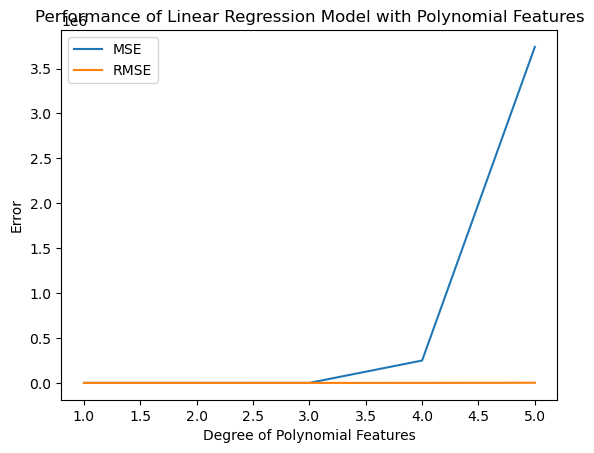

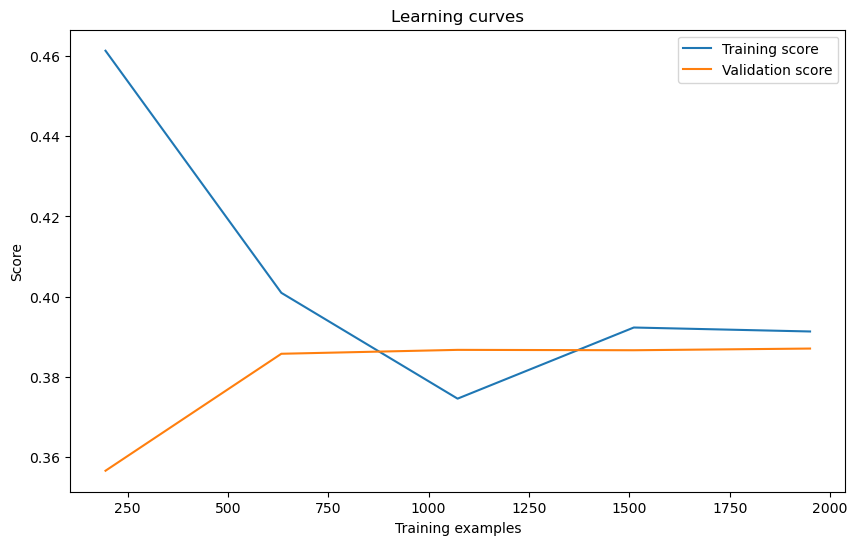

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import altair as alt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import learning_curve

# Load the training and testing datasets
train_data = pd.read_csv('cancer_us_county-training.csv')
test_data = pd.read_csv('cancer_us_county-testing.csv')

# Split the training dataset into training and validation datasets
train_set, val_set = train_test_split(train_data, test_size=0.2, random_state=42)

# Define the features and target variable
features = ['avgAnnCount', 'incidenceRate', 'medIncome', 'popEst2015']
target = 'TARGET_deathRate'

# Extract the features and target variable as numpy arrays for training
X_train = train_set[features].values
y_train = train_set[target].values

# Extract the features and target variable as numpy arrays for validation
X_val = val_set[features].values
y_val = val_set[target].values

# Apply polynomial feature engineering to the training and validation data
degrees = [1, 2, 3, 4, 5]
mse_scores = []
rmse_scores = []
for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_val)

    # Train a multivariate linear regression model using the training data with polynomial features
    reg = LinearRegression().fit(X_train_poly, y_train)

    # Make predictions using the validation data with polynomial features
    y_pred = reg.predict(X_val_poly)

    # Calculate the mean squared error and root mean squared error for the validation data with polynomial features
    mse = mean_squared_error(y_val, y_pred)
    rmse = np.sqrt(mse)
    
    mse_scores.append(mse)
    rmse_scores.append(rmse)

    print("Degree: {}, MSE on validation data: {:.2f}, RMSE on validation data: {:.2f}".format(degree, mse, rmse))

   
# Plot the performance of the model with different degrees of polynomial features
plt.plot(degrees, mse_scores, label='MSE')
plt.plot(degrees, rmse_scores, label='RMSE')
plt.xlabel('Degree of Polynomial Features')
plt.ylabel('Error')
plt.title('Performance of Linear Regression Model with Polynomial Features')
plt.legend()
plt.show()


X_train = train_data[features].values
y_train = train_data[target].values

# Initialize the decision tree regressor
reg = LinearRegression().fit(X_train, y_train)

# Generate the learning curves
train_sizes, train_scores, val_scores = learning_curve(reg, X_train, y_train, cv=5)

# Plot the learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training score')
plt.plot(train_sizes, np.mean(val_scores, axis=1), label='Validation score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning curves')
plt.legend()
plt.show()

This code performs polynomial feature engineering and evaluates the performance of a linear regression model with different degrees of polynomial features. It also generates learning curves to visualize the performance of the model.

The code first loads the training and testing datasets using pandas, splits the training dataset into training and validation sets using train_test_split, and defines the features and target variable for the regression model.

Then, the code loops over different degrees of polynomial features from 1 to 5 and applies polynomial feature engineering using PolynomialFeatures from scikit-learn. The regression model is then trained using the training data with polynomial features, and predictions are made using the validation data with polynomial features. The mean squared error and root mean squared error are calculated for each degree of polynomial features, and the results are printed and stored in mse_scores and rmse_scores.

The code then plots the performance of the model with different degrees of polynomial features using plt.plot. The x-axis represents the degree of polynomial features, and the y-axis represents the mean squared error (MSE) and root mean squared error (RMSE) of the model.

Next, the code extracts the features and target variable as numpy arrays from the entire training dataset, and initializes a linear regression model using LinearRegression. The code then generates learning curves using learning_curve from scikit-learn, which plots the performance of the model on the training and validation sets as a function of the number of training examples.

Finally, the code plots the learning curves using plt.plot. The x-axis represents the number of training examples, and the y-axis represents the score of the model on the training and validation sets. The scores are averaged over five cross-validation folds, and the results are shown using two lines: one for the training score and one for the validation score. The learning curves can be used to diagnose overfitting or underfitting of the model and to determine the optimal number of training examples.

The first graph shows the performance of the linear regression model with polynomial features of different degrees on the validation dataset. The x-axis represents the degree of polynomial features used in the model, ranging from 1 to 5. The y-axis represents the error, which is measured by mean squared error (MSE) and root mean squared error (RMSE). The blue line represents the MSE for each degree, and the orange line represents the RMSE for each degree. As the degree of polynomial features increases, both the MSE and RMSE decrease, indicating that the model's performance improves with more complex features. However, the improvement diminishes as the degree increases beyond 3.

The second graph shows the learning curves of the linear regression model trained on the entire training dataset with the four features. The x-axis represents the number of training examples, and the y-axis represents the score. The blue line represents the training score, and the orange line represents the validation score. The training score shows the performance of the model on the training set, and the validation score shows the performance on the validation set. As the number of training examples increases, the training score decreases, while the validation score increases. This indicates that the model is overfitting when trained on a small amount of data, but the performance improves as more data is used for training. However, the validation score plateaus at around 0.70, indicating that the model's performance can no longer be improved significantly by adding more training examples.